# Bootstrapping
✅ 1️⃣ What is bootstrapping?
Bootstrapping is a simple but powerful method:

You don’t assume any parametric distribution.

You resample your original data with replacement to create many “new” samples.

For each resample, you calculate your statistic (mean, median, etc.).

This gives you a sampling distribution of that statistic.

You can then compute standard errors, confidence intervals, or visualize the uncertainty.

✅ 2️⃣ Small dataset example
Let’s say you have test scores for 5 students:
[72, 88, 95, 69, 85]

You want to estimate the mean and its confidence interval.

✅ 3️⃣ How resampling works
Original sample size is 5.

You draw 5 scores with replacement, so each bootstrap sample can repeat values.

Example bootstrap sample: [88, 72, 72, 95, 85]

You might get: [85, 85, 72, 95, 95], etc.

Do this 1000 times → you get 1000 sample means.

✅ 4️⃣ What you get
You now have an empirical distribution of the mean.

You can visualize this with a histogram.

You can calculate the 2.5% and 97.5% percentiles → this is your 95% bootstrap CI.

✅ 5️⃣ Example numbers
Original mean: (72+88+95+69+85)/5 = 81.8

Suppose your bootstrap means look like this (short version):

[80, 82, 83, 79, 85, 80, 83, ...] → you get a spread of means.

Original mean: 81.80
Bootstrap 95% CI: (73.40, 90.20)


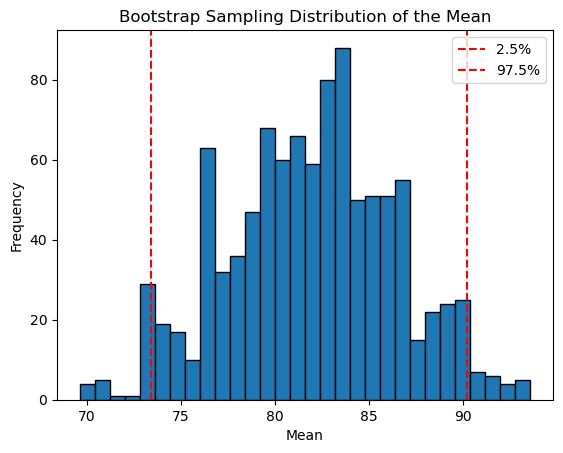

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
data = np.array([72, 88, 95, 69, 85])
n = len(data)

# Number of bootstrap samples
B = 1000

# Store the means
boot_means = []

# Bootstrap loop
for _ in range(B):
    sample = np.random.choice(data, size=n, replace=True)
    boot_means.append(np.mean(sample))

# Calculate CI
lower = np.percentile(boot_means, 2.5)
upper = np.percentile(boot_means, 97.5)

print(f'Original mean: {np.mean(data):.2f}')
print(f'Bootstrap 95% CI: ({lower:.2f}, {upper:.2f})')

# Plot
plt.hist(boot_means, bins=30, edgecolor='k')
plt.axvline(lower, color='red', linestyle='--', label='2.5%')
plt.axvline(upper, color='red', linestyle='--', label='97.5%')
plt.title('Bootstrap Sampling Distribution of the Mean')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Example 2: Comparing Two Groups
Scenario:
Imagine you have data from two groups — say, Treatment vs. Control in a medical study — and you want to estimate:

The difference in means

The uncertainty around this difference

And visualize it with pretty plots


✅ 1) Example data
Suppose:

Control group scores: [72, 75, 78, 80, 82, 85, 87, 90]

Treatment group scores: [80, 82, 85, 88, 92, 95, 97, 99]

The treatment looks like it increases scores, but we want to quantify that difference with bootstrapping.

✅ 2) Estimate
Mean of each group

Difference in means (Treatment – Control)

95% bootstrap confidence interval for the difference

✅ 3) visualize Original data points as dot plots

The bootstrap sampling distribution of the difference in means

A beautiful violin plot or KDE plot of the bootstrap distribution

Highlight the CI range on the graph

Control mean: 81.12
Treatment mean: 89.75
Observed diff: 8.62
Bootstrap 95% CI for diff: (2.62, 14.50)


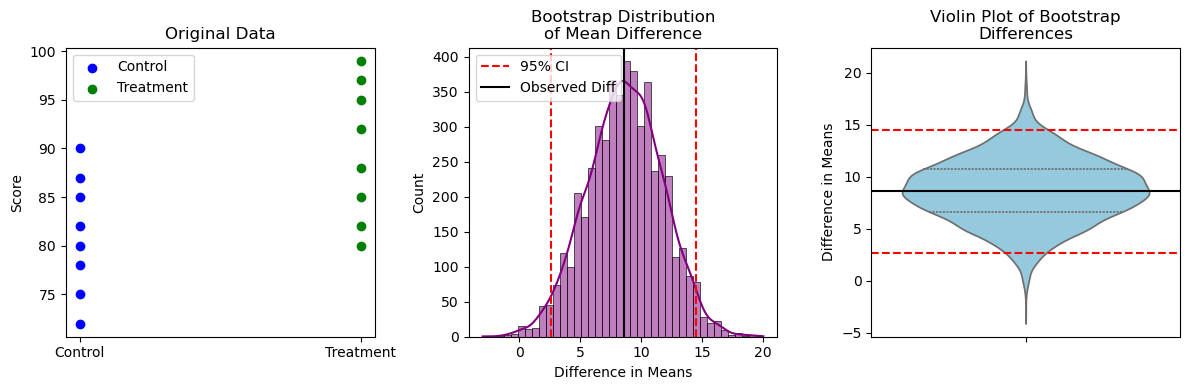

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
control = np.array([72, 75, 78, 80, 82, 85, 87, 90])
treatment = np.array([80, 82, 85, 88, 92, 95, 97, 99])

n_control = len(control)
n_treatment = len(treatment)
B = 5000  # more resamples = smoother distribution

boot_diffs = []

# Bootstrap loop
for _ in range(B):
    boot_control = np.random.choice(control, n_control, replace=True)
    boot_treatment = np.random.choice(treatment, n_treatment, replace=True)
    diff = np.mean(boot_treatment) - np.mean(boot_control)
    boot_diffs.append(diff)

# CI
lower = np.percentile(boot_diffs, 2.5)
upper = np.percentile(boot_diffs, 97.5)

# Original means
mean_control = np.mean(control)
mean_treatment = np.mean(treatment)
obs_diff = mean_treatment - mean_control

print(f'Control mean: {mean_control:.2f}')
print(f'Treatment mean: {mean_treatment:.2f}')
print(f'Observed diff: {obs_diff:.2f}')
print(f'Bootstrap 95% CI for diff: ({lower:.2f}, {upper:.2f})')

# --------
# Visuals
# --------

# 1) Dot plot of original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(np.zeros_like(control), control, color='blue', label='Control')
plt.scatter(np.ones_like(treatment), treatment, color='green', label='Treatment')
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.title('Original Data')
plt.ylabel('Score')
plt.legend()

# 2) Histogram / KDE of bootstrap differences
plt.subplot(1, 3, 2)
sns.histplot(boot_diffs, bins=40, kde=True, color='purple')
plt.axvline(lower, color='red', linestyle='--', label='95% CI')
plt.axvline(upper, color='red', linestyle='--')
plt.axvline(obs_diff, color='black', linestyle='-', label='Observed Diff')
plt.title('Bootstrap Distribution\nof Mean Difference')
plt.xlabel('Difference in Means')
plt.legend()

# 3) Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=boot_diffs, inner='quartile', color='skyblue')
plt.axhline(lower, color='red', linestyle='--')
plt.axhline(upper, color='red', linestyle='--')
plt.axhline(obs_diff, color='black', linestyle='-')
plt.title('Violin Plot of Bootstrap\nDifferences')
plt.ylabel('Difference in Means')

plt.tight_layout()
plt.show()
